In [1]:
#OCR Project

In [2]:
#--Importing required libraries
import PIL 
import pytesseract
import cv2
import matplotlib.pyplot as plt

In [3]:
#pip install pillow

In [4]:
img = PIL.Image.open('E:/Downloads/CV Data/pdf_ocr.jpg')

In [5]:
print(f"Image format : {img.format}")
print(f"Image size : {img.size}")

Image format : JPEG
Image size : (1142, 1473)


In [6]:
img.show()

In [7]:
img = cv2.imread('E:/Downloads/CV Data/pdf_ocr.jpg')
#cv2.imshow('Image',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [8]:
def display(img_path):
    dpi = 50
    img = cv2.imread(img_path)
    
    height,width,depth = img.shape
    figsize = width/float(dpi), height/float(dpi)
    plt.figure(figsize = figsize)
    plt.imshow(img,cmap = 'gray')
    plt.axis('off')
    plt.show()
#--Shows much larger image than the original
#The need for setting a specific DPI value in this function is to control the size of the displayed image. 
#By adjusting the DPI, you can control how large or small the image appears when displayed with Matplotlib. 
#This can be important, especially when you want to ensure that the displayed image has a specific size or resolution, 
#or if you are preparing images for publication or presentation where image quality and size matter.

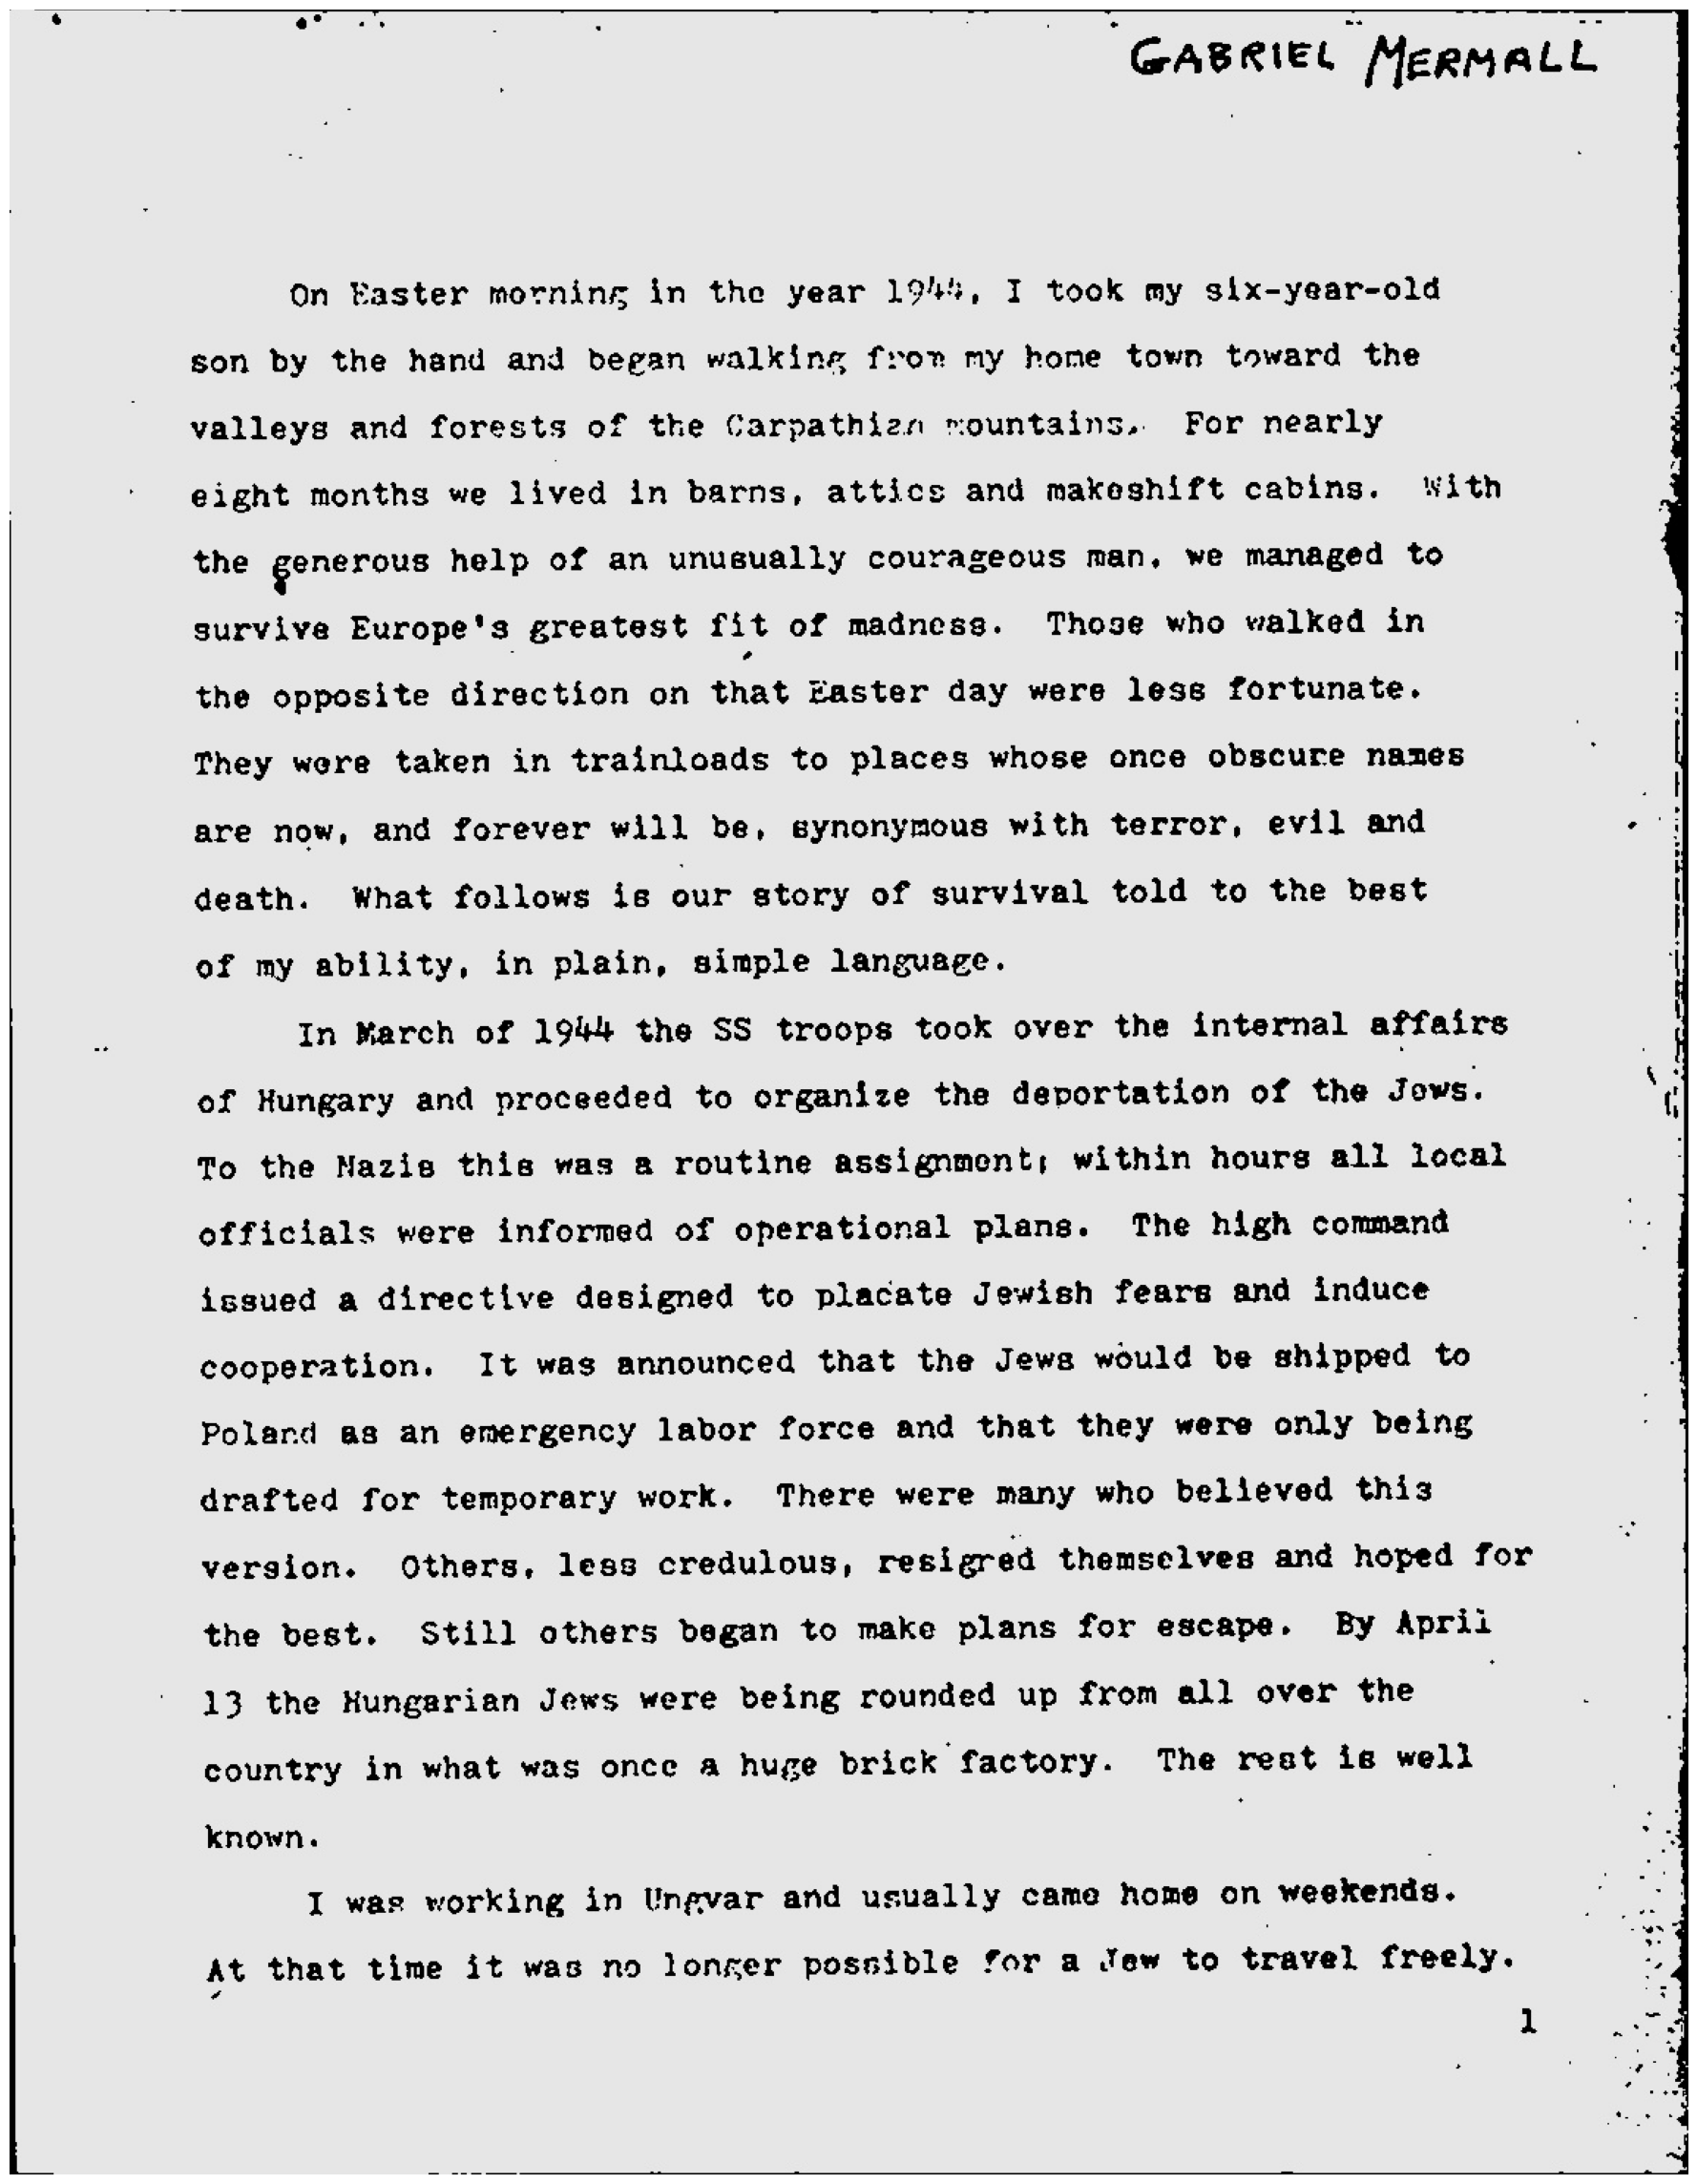

In [9]:
display('E:/Downloads/CV Data/pdf_ocr.jpg')

In [10]:
#Intervedt Images 
#Convert the blacks spectrum one's to white and vise versa
#A must do preprocessing step for tessarct 3.x however if you are using version 4 it might give poorer results

In [11]:
inverted_img = cv2.bitwise_not(img)
cv2.imwrite('E:/Downloads/CV Data/pdf_ocr inverted.jpg',inverted_img) #--To save in the file 

True

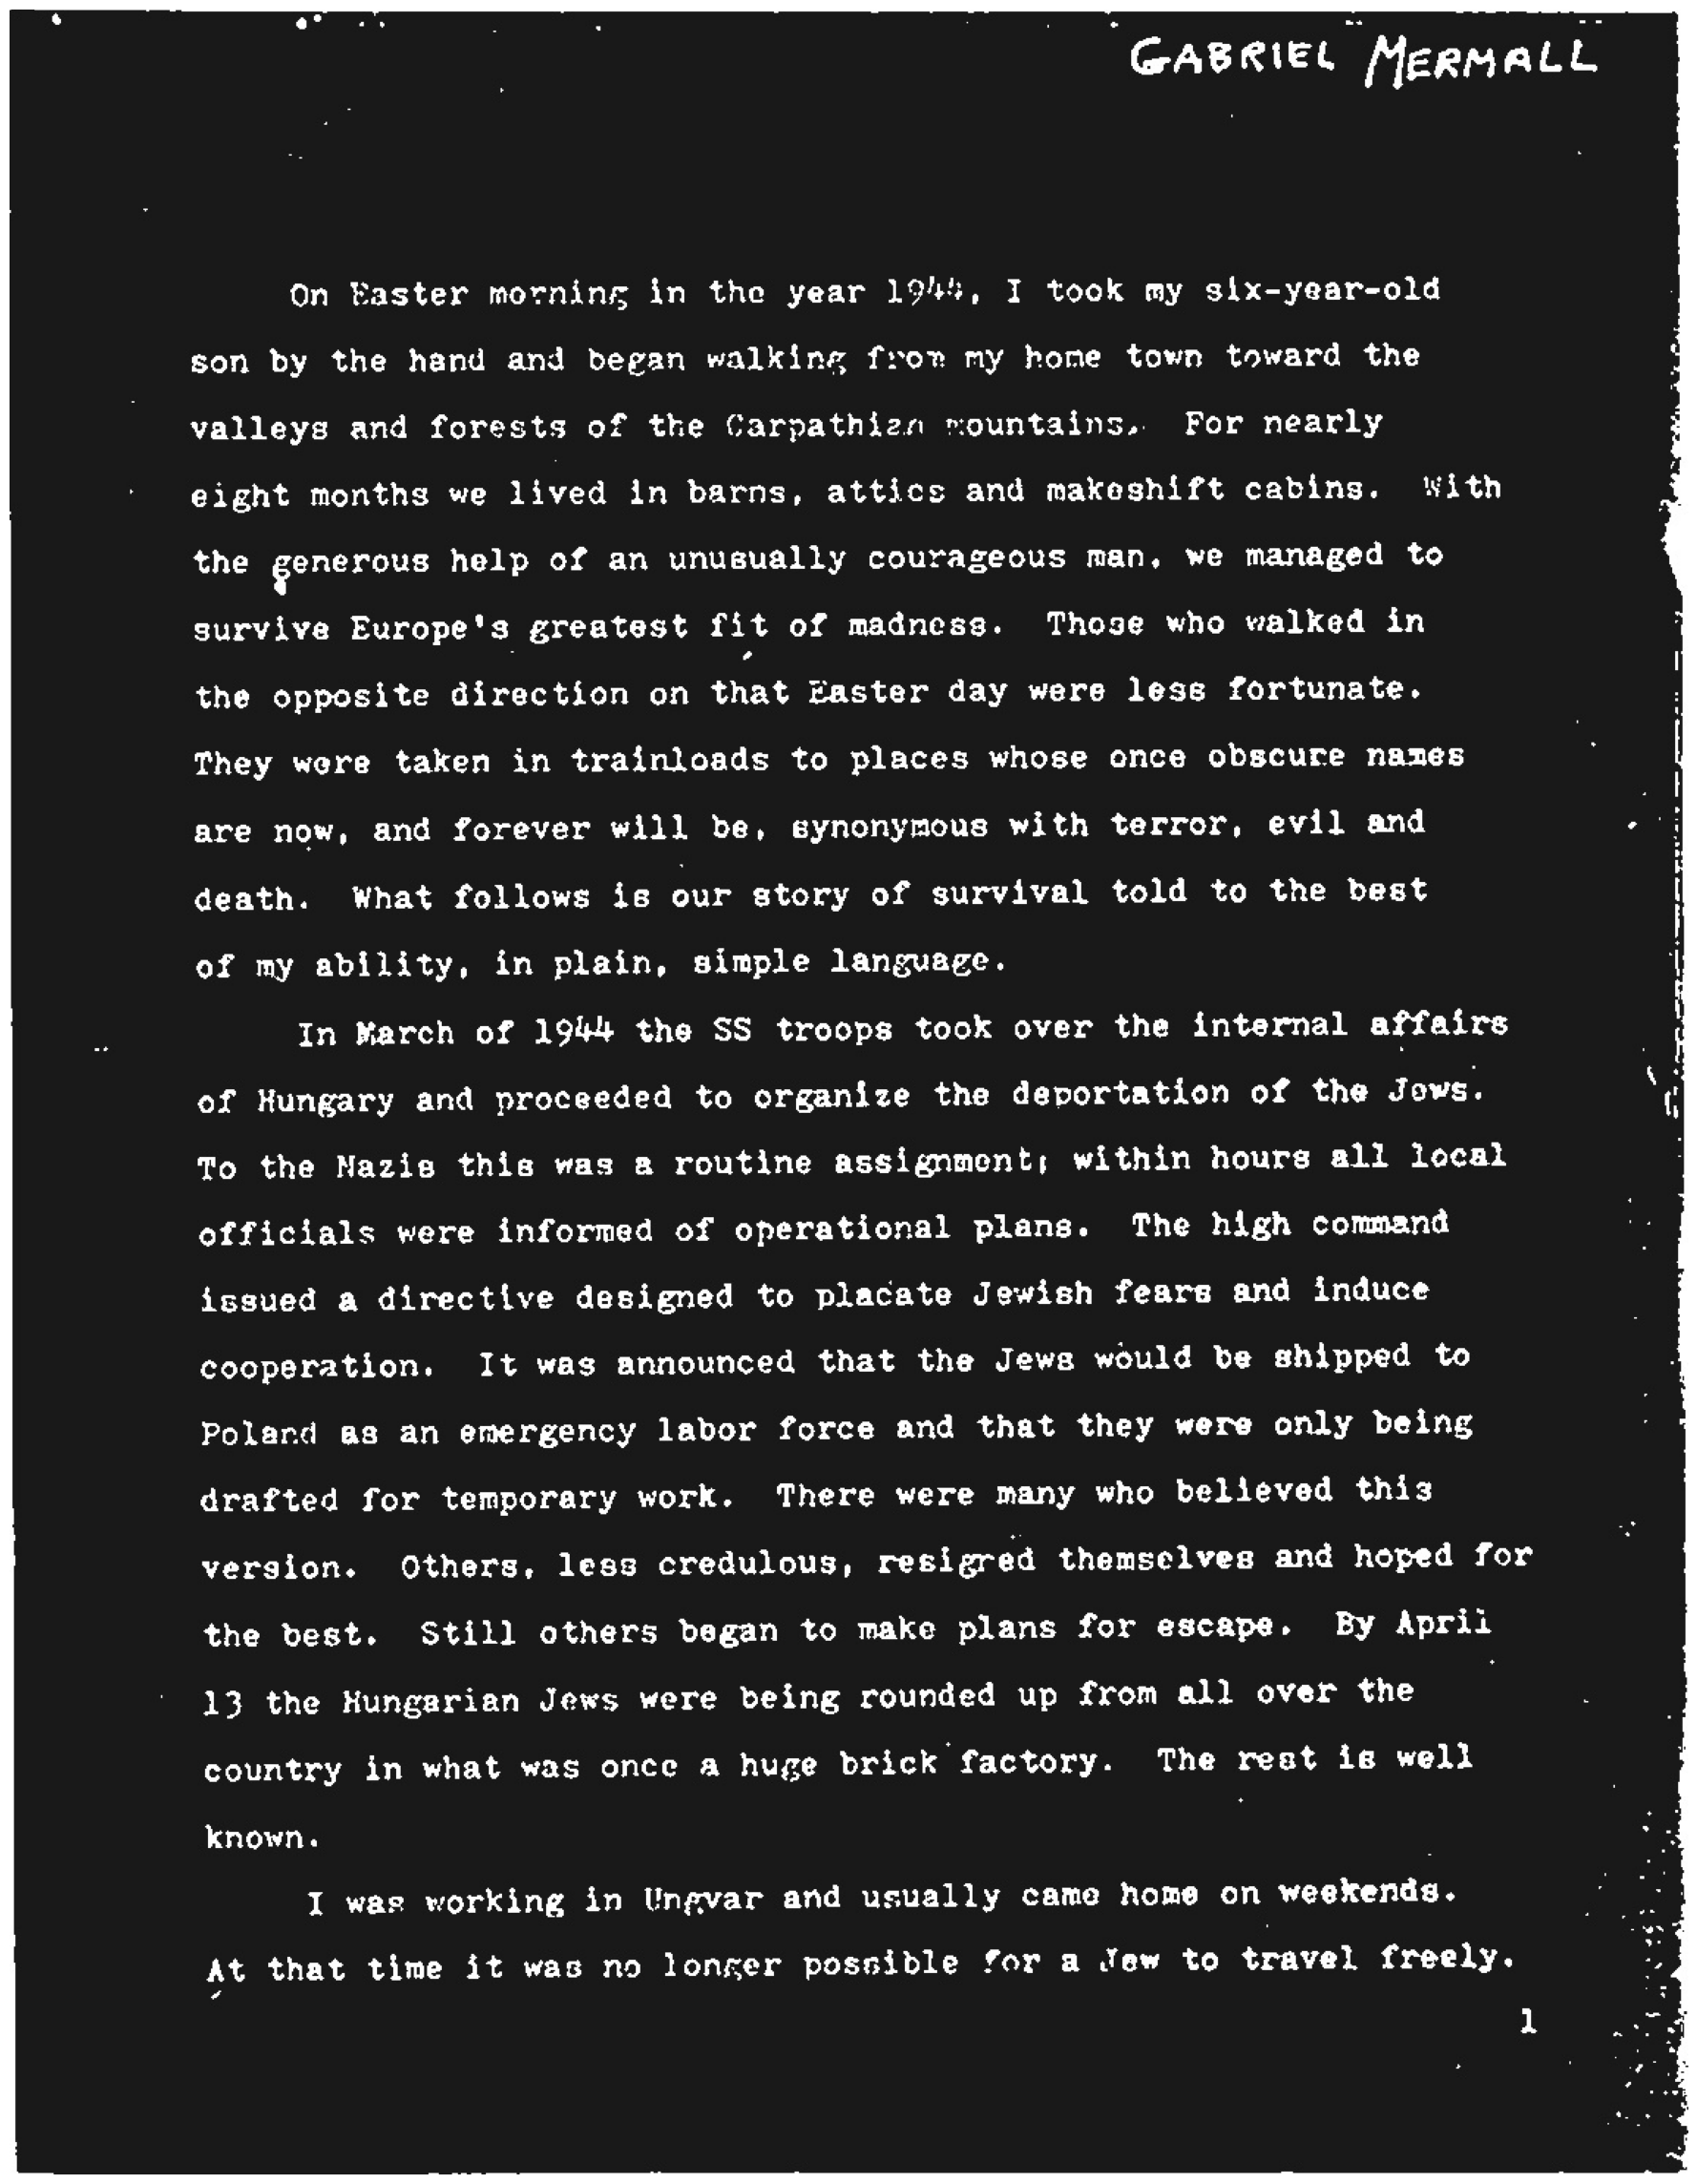

In [12]:
display('E:/Downloads/CV Data/pdf_ocr inverted.jpg')

In [13]:
#Rescaling 
#There exists a good range in which your image should be for a good OCR which comes down to the
#height of your characters bascially your dpi

#A difficult task

In [14]:
#Binarization -- convert image into black and white 
#First need is to thave a grey scale image beacuse it makes the thresholding easy

In [15]:
def gray_scale(img_path):
    gray_img = cv2.imread(img_path,0)
    plt.imshow(gray_img, cmap = 'gray')
    plt.axis('off')
    plt.show()

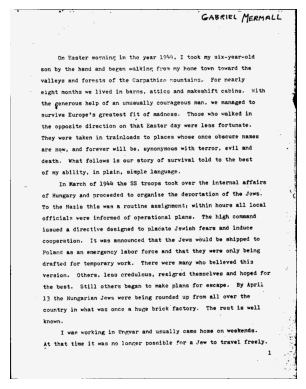

In [16]:
gray_scale('E:/Downloads/CV Data/pdf_ocr.jpg')

In [17]:
#Threshold to finally convert the image into strictally black and white

In [18]:
gray_img = cv2.imread('E:/Downloads/CV Data/pdf_ocr.jpg',0)

In [19]:
thresh,im_bw = cv2.threshold(gray_img, 120,255, cv2.THRESH_BINARY)
cv2.imwrite('E:/Downloads/CV Data/pdf_ocr black_white.jpg', im_bw)

#200,230 gave better results what and how will be done later

True

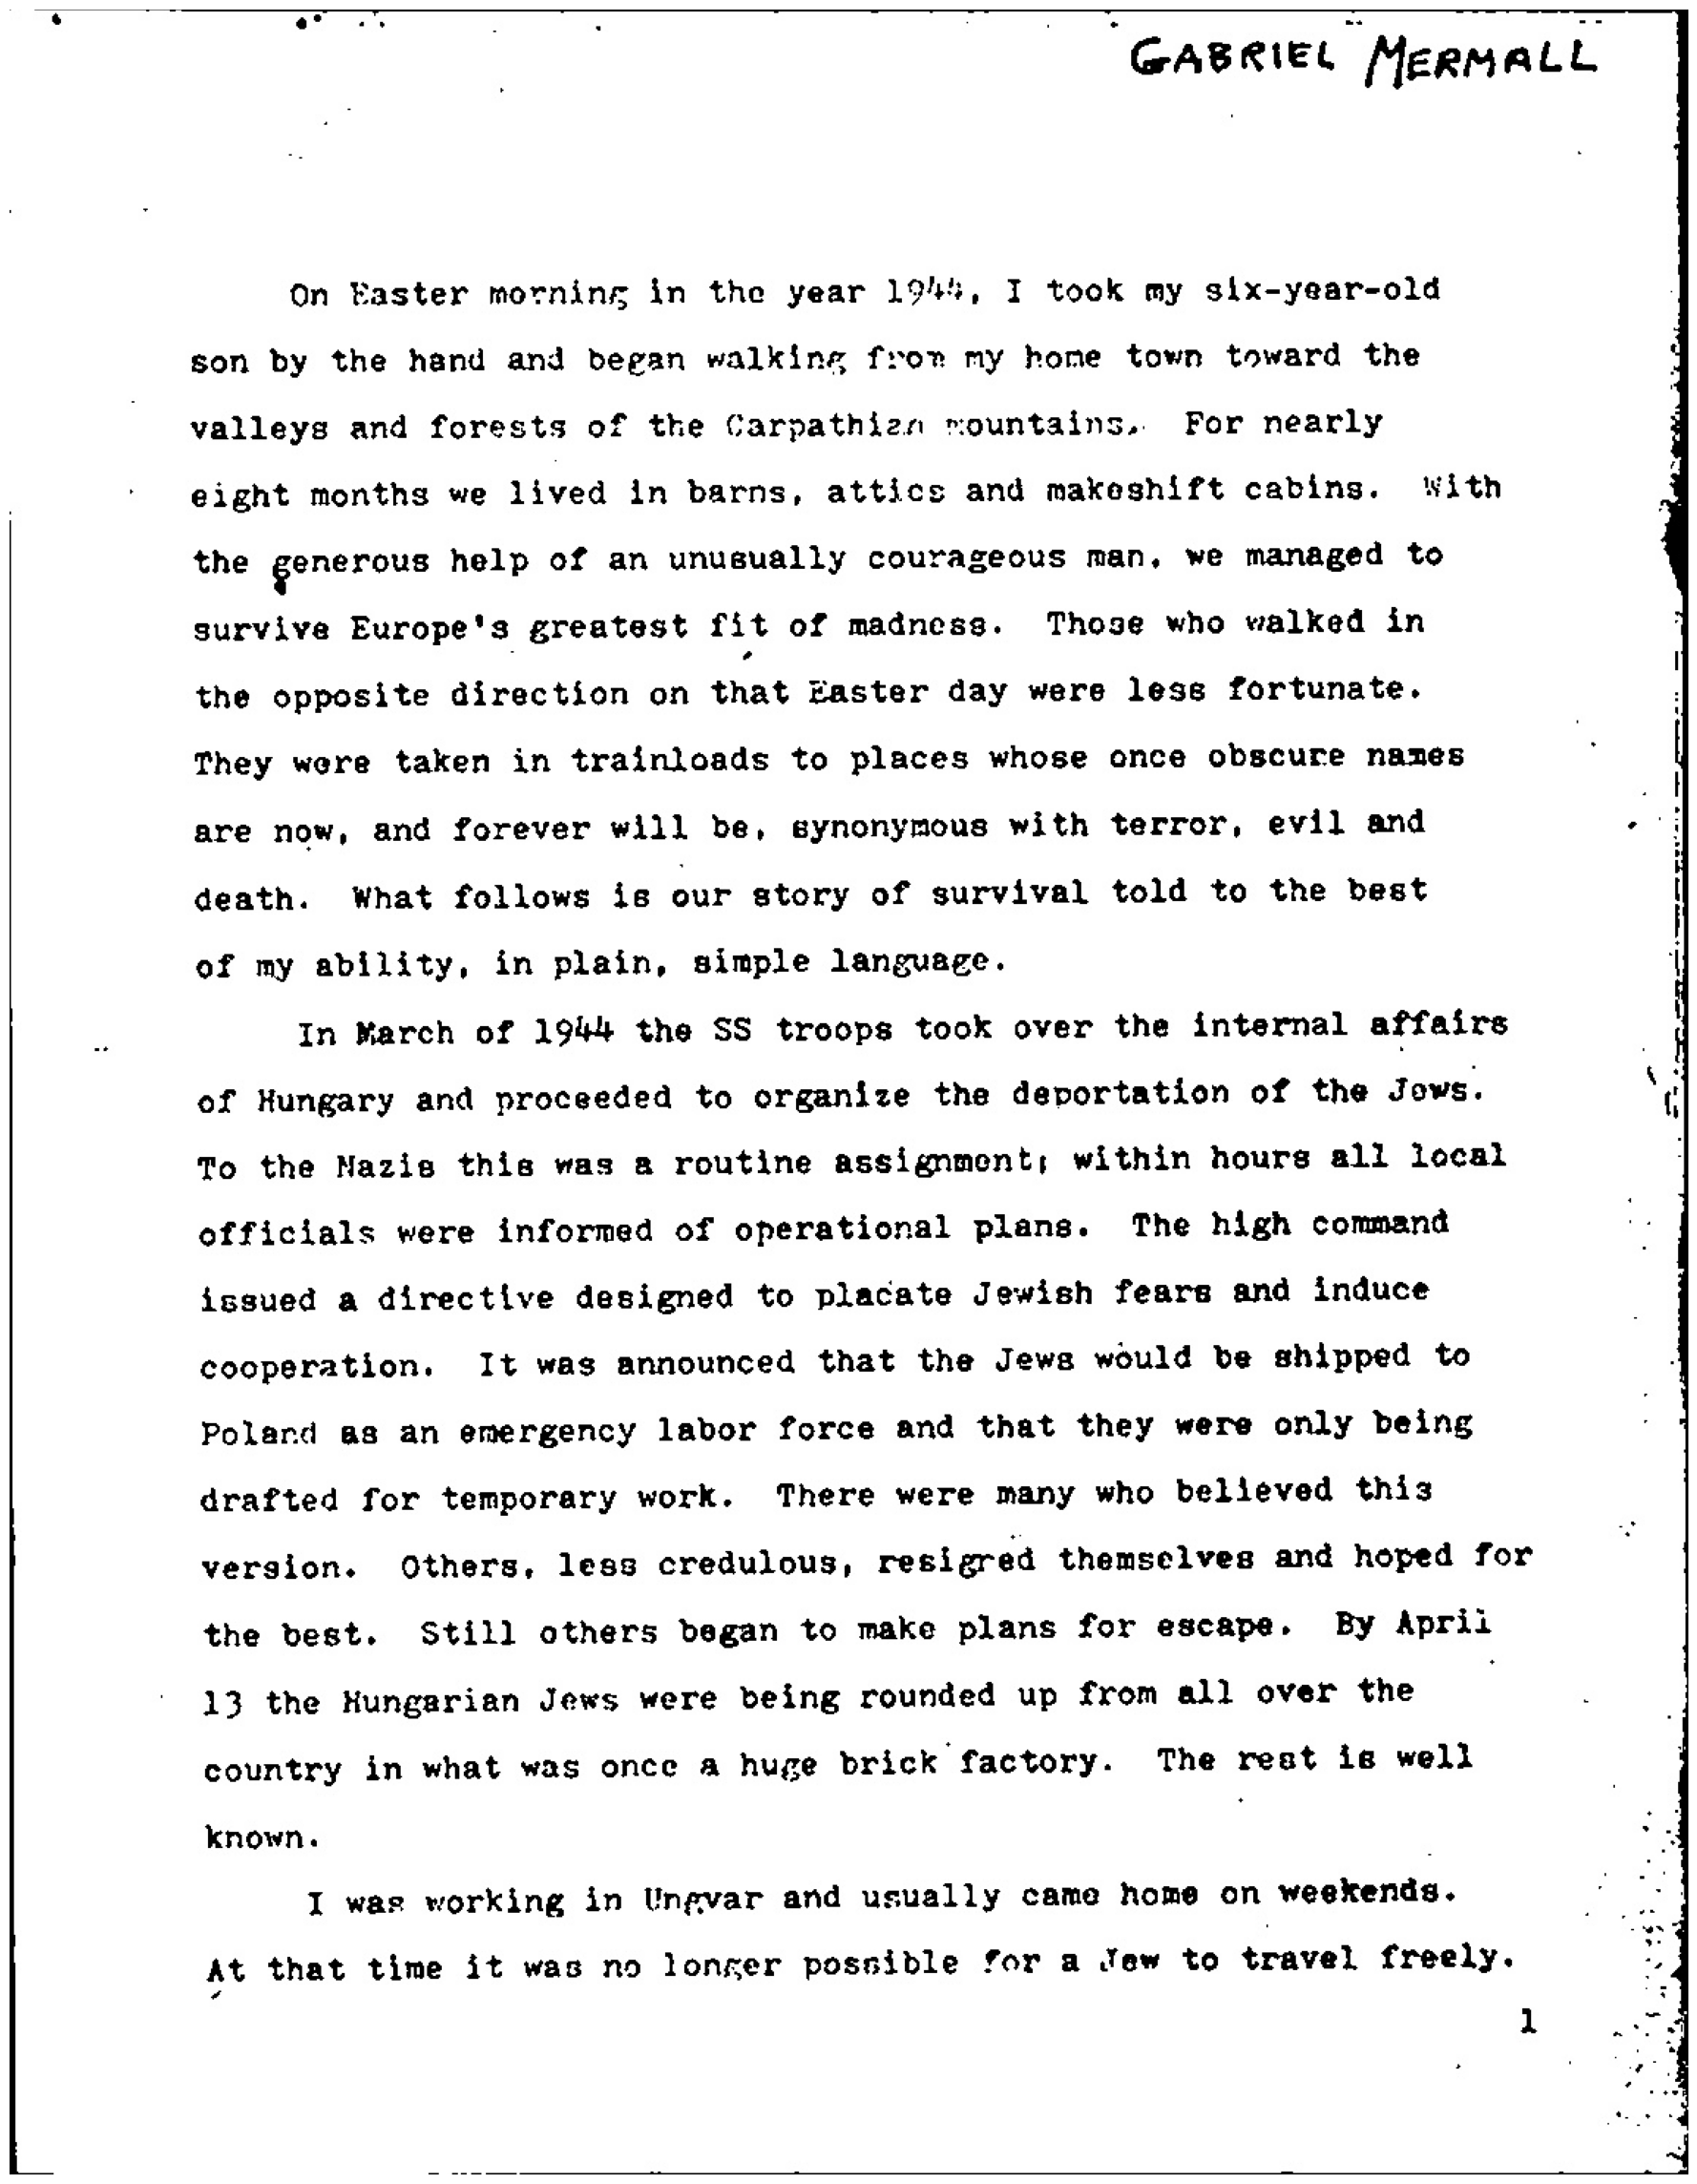

In [20]:
display('E:/Downloads/CV Data/pdf_ocr black_white.jpg')

In [21]:
#The result seems same to the one with the grey scale, however for different documents the result might be different

In [22]:
#Noise removal 
#This corresponds to those pixels which dont represent any text per say ... they could be like rough brushstrokes on paper
#Or dots around the actual text data -- of no use basically

In [23]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1,1), np.uint8)
    image = cv2.dilate(image, kernel, iterations = 1)
    kernel = np.ones((1,1), np.uint8)
    image = cv2.erode(image, kernel, iterations = 1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE ,kernel) # this and median blur get rid of background noise 
    image = cv2.medianBlur(image,1)
    return image

In [24]:
#cv2.imshow('Image after noise',noise_removal(img))
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [25]:
noise_removal_pdf = noise_removal(img)
cv2.imwrite('E:/Downloads/CV Data/noise_removal_pdf.jpg', noise_removal_pdf)

True

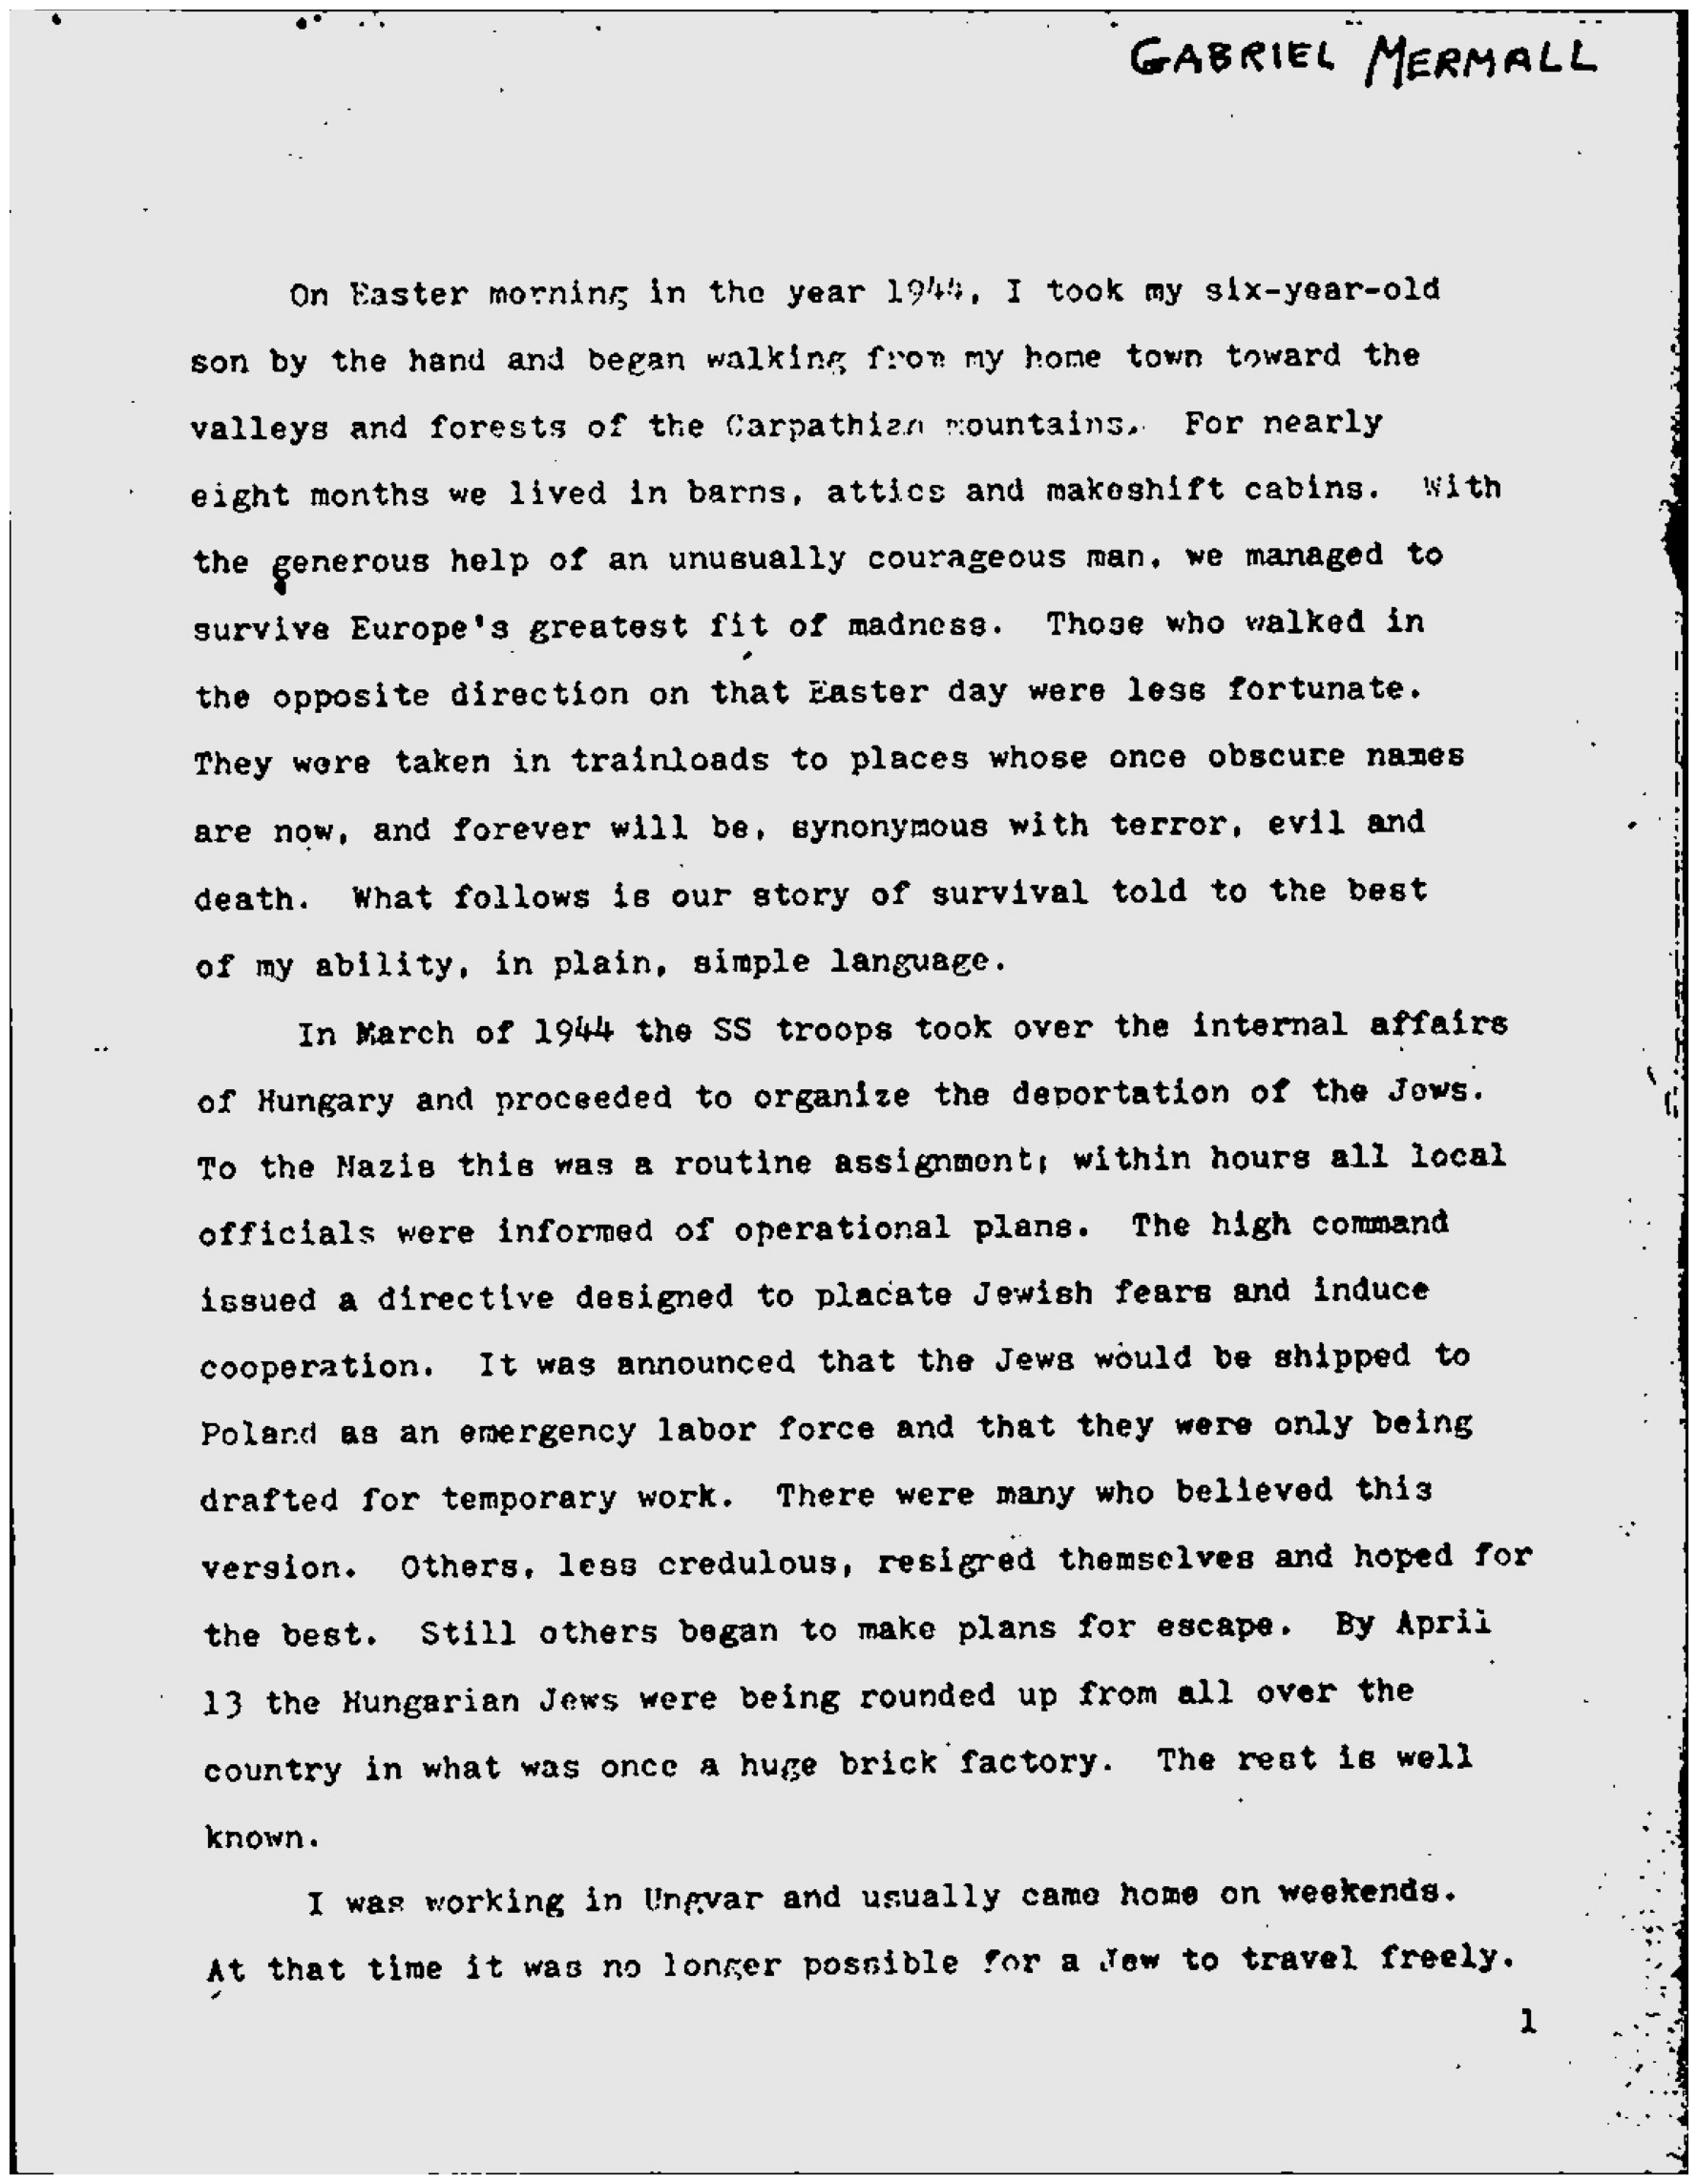

In [26]:
display('E:/Downloads/CV Data/noise_removal_pdf.jpg')

In [27]:
#Dilation and Erosion(thining font) are used when the letters are too big or too small

In [28]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((1,2),np.uint8)
    image = cv2.erode(image, kernel, iterations = 1)
    image = cv2.bitwise_not(image)
    return (image)

In [29]:
#cv2.imshow('Image with thin font',thin_font(img))
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [30]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((1,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations = 1)
    image = cv2.bitwise_not(image)
    return (image)

In [31]:
#cv2.imshow('Image with thick font',thick_font(img))
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [32]:
#--Setting the tesseract path
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [33]:
ocr_result = pytesseract.image_to_string(img)

In [34]:
print(ocr_result)

 

 

“GABRIEL Meamall

On Easter morning in the year 194%, I took my six-year-old
son by the hand and began walking from my home town toward the
valleys and forests of the Carpathi2n mountains. For nearly
eight months we lived in barns, attics and makeshift cabins. With
the generous nelp of an unusually courageous man, we managed to
survive Europe's greatest fit of madness. Those who walked in
the opposite direction on that Easter day were lese fortunate.
They were taken in trainloads to places whose once obscure names
are now, and forever will be, synonymous with terror, evil and
death. What follows is our story of survival told to the best
of my ability, in plain, simple language.

In March of 1944 the SS troops took over the internal affairs
of Hungary and proceeded to organize the deportation of the dows.
To the Nazie thie was a routine assignment; within hours all local
officials were informed of operational plans. The high command
issued a directive designed to placate Jewish fe

In [35]:
#dir(pytesseract)

['ALTONotSupported',
 'Output',
 'TSVNotSupported',
 'TesseractError',
 'TesseractNotFoundError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'get_languages',
 'get_tesseract_version',
 'image_to_alto_xml',
 'image_to_boxes',
 'image_to_data',
 'image_to_osd',
 'image_to_pdf_or_hocr',
 'image_to_string',
 'pytesseract',
 'run_and_get_output']

In [36]:
from summarizer import Summarizer

In [37]:
model = Summarizer()
summary = model(ocr_result)
print(summary)

“GABRIEL Meamall

On Easter morning in the year 194%, I took my six-year-old
son by the hand and began walking from my home town toward the
valleys and forests of the Carpathi2n mountains. To the Nazie thie was a routine assignment; within hours all local
officials were informed of operational plans. The high command
issued a directive designed to placate Jewish fears and induce
cooperation. At that time it was no loner possible for a Jew to travel freely.
